In this homework, we'll deploy the bees vs wasps model we trained in the previous homework.

In [1]:
import subprocess
import os
from pathlib import Path
from io import BytesIO
from urllib import request
from PIL import Image
import numpy as np

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.lite as tflite
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

In [4]:
data_file_url = 'https://github.com/alexeygrigorev/large-datasets/releases/download/wasps-bees/bees-wasps.h5'
path = Path.cwd() / 'bees-wasps.h5'
if not path.is_file():
    subprocess.run(['wget', '-c', '-nv', data_file_url])

### Question 1

Now convert this model from Keras to TF-Lite format. What's the size of the converted model?

* 21 Mb
* 43 Mb
* 80 Mb
* 164 Mb

In [5]:
model = keras.models.load_model('bees-wasps.h5', compile=False)

In [6]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/47/qjky30_d7_gbx41qhtyr_0z80000gn/T/tmp0f14qiw3/assets


INFO:tensorflow:Assets written to: /var/folders/47/qjky30_d7_gbx41qhtyr_0z80000gn/T/tmp0f14qiw3/assets


In [7]:
with open('bees-wasps.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

### Question 2

To be able to use this model, we need to know the index of the input and the index of the output. What's the output index for this model?

* 3
* 7
* 13
* 24

In [8]:
interpreter = tflite.Interpreter(model_path='bees-wasps.tflite')
interpreter.allocate_tensors()

INFO: Initialized TensorFlow Lite runtime.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


In [9]:
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']
print(f'Input index: {input_index}, Output index: {output_index}')

Input index: 0, Output index: 13


### Preparing the image

You'll need some code for downloading and resizing images. You can use this code below.

In [10]:
def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img

In [11]:
def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

Let's download and resize this [image](https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg). Based on the previous homework, what should be the target size for the image?

### Question 3

Now we need to turn the image into numpy array and pre-process it.

* Tip: Check the previous homework. What was the pre-processing we did there?

After the pre-processing, what's the value in the first pixel, the R channel?

* 0.3450980
* 0.5450980
* 0.7450980
* 0.9450980

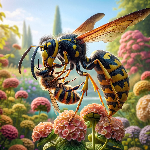

In [12]:
photo_url = 'https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg'
img = download_image(photo_url)
img = prepare_image(img, target_size=(150, 150))
img

In [13]:
def prepare_input(x):
    return x / 255.0

In [14]:
x = np.array(img, dtype='float32')
X = np.array([x])
X = prepare_input(X)

In [15]:
X[0, 0, 0, 0]

0.94509804